In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load data
url = 'https://raw.githubusercontent.com/Kaju-barnwal/DataSets/refs/heads/main/Social_Network_Ads.csv'
data = pd.read_csv(url)
data


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
# Inspect data
print(data.info())
print(data.describe())
print(data['Purchased'].value_counts())  # Check class balance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    15

In [ ]:
# Select features and target
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Default Decision Tree Accuracy: 0.9166666666666666
Confusion Matrix:
 [[69  4]
 [ 6 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        73
           1       0.91      0.87      0.89        47

    accuracy                           0.92       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

CV Scores: [0.95  0.75  0.9   0.975 0.975 0.825 0.8   0.775 0.875 0.925]
Mean CV Accuracy: 0.875


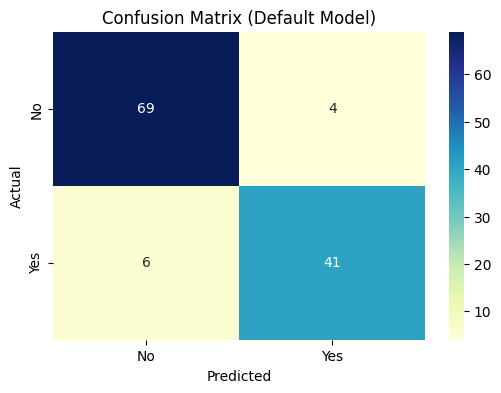

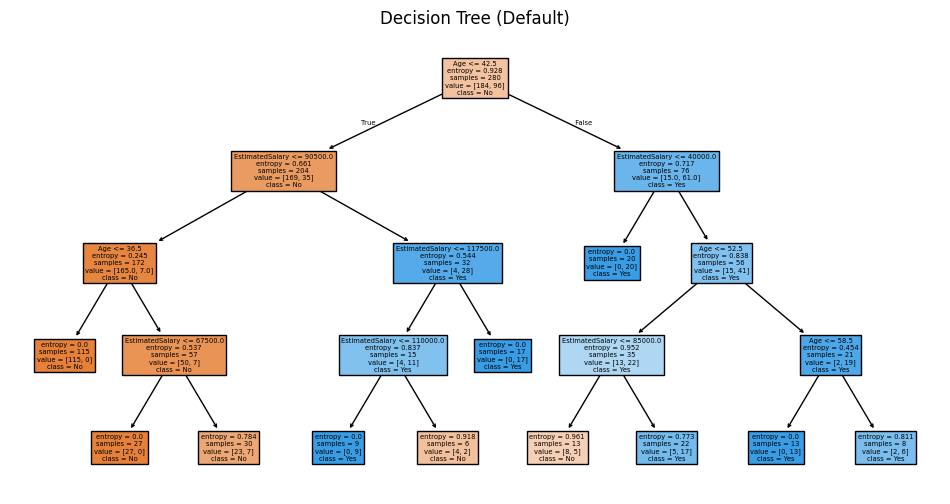

Best max_depth from GridSearchCV: {'max_depth': 4}
Tuned Decision Tree Accuracy: 0.925
Tuned Model Confusion Matrix:
 [[69  4]
 [ 5 42]]
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.91      0.89      0.90        47

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.93      0.92       120

Tuned CV Scores: [0.95  0.75  0.9   0.975 0.975 0.825 0.8   0.775 0.85  0.925]
Mean Tuned CV Accuracy: 0.8724999999999999


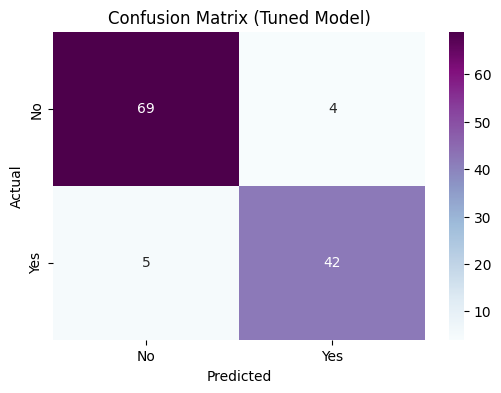

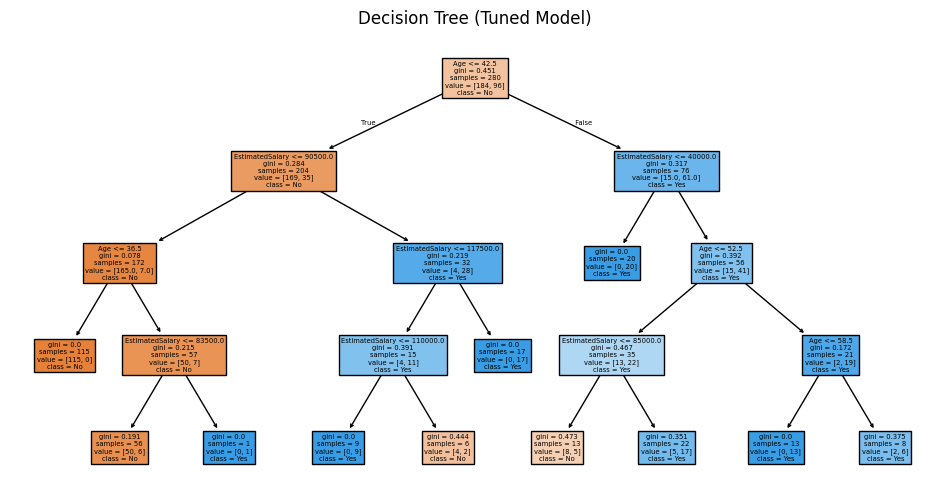

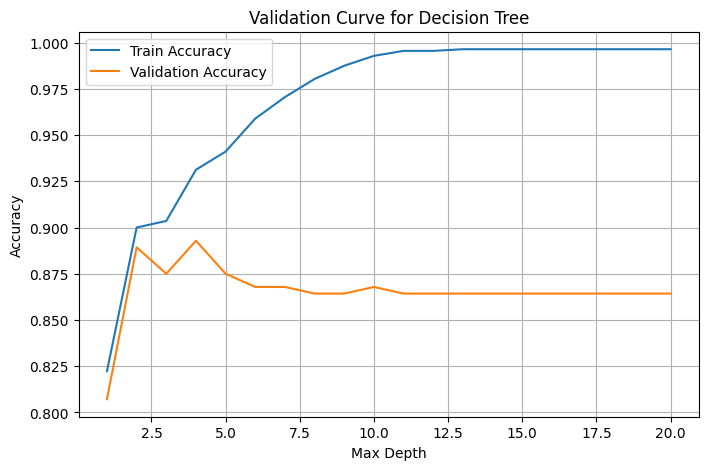

In [17]:
### -------------------------------
### 1. Default Decision Tree Model
### -------------------------------

tree_model = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
tree_model.fit(X_train, y_train)

# Predict
val_preds = tree_model.predict(X_val)

# Accuracy
tree_acc = accuracy_score(y_val, val_preds)
print("Default Decision Tree Accuracy:", tree_acc)

# Confusion Matrix
tree_cm = confusion_matrix(y_val, val_preds)
print("Confusion Matrix:\n", tree_cm)

# Classification Report
tree_cr = classification_report(y_val, val_preds)
print("Classification Report:\n", tree_cr)

# Cross-validation
tree_cv = cross_val_score(tree_model, X, y, cv=10)
print("CV Scores:", tree_cv)
print("Mean CV Accuracy:", tree_cv.mean())

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(tree_cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix (Default Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Default)")
plt.show()


### --------------------------------
### 2. Hyperparameter Tuning (GridSearchCV)
### --------------------------------

param_grid = {'max_depth': range(1, 21)}
grid_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(grid_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best max_depth from GridSearchCV:", grid_search.best_params_)

# Evaluate best model on validation set
best_tree_model = grid_search.best_estimator_
best_val_preds = best_tree_model.predict(X_val)

best_acc = accuracy_score(y_val, best_val_preds)
print("Tuned Decision Tree Accuracy:", best_acc)

# Confusion Matrix
best_cm = confusion_matrix(y_val, best_val_preds)
print("Tuned Model Confusion Matrix:\n", best_cm)

# Classification Report
best_cr = classification_report(y_val, best_val_preds)
print("Tuned Model Classification Report:\n", best_cr)

# Cross-validation of tuned model
tuned_cv_scores = cross_val_score(best_tree_model, X, y, cv=10)
print("Tuned CV Scores:", tuned_cv_scores)
print("Mean Tuned CV Accuracy:", tuned_cv_scores.mean())

# Plot Confusion Matrix for Tuned Decision Tree Model
plt.figure(figsize=(6, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the Best Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(best_tree_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree (Tuned Model)")
plt.show()


### -------------------------------
### 3. Validation Curve for max_depth
### -------------------------------

train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X_train, y_train,
    param_name='max_depth',
    param_range=range(1, 21),
    cv=5
)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), train_scores.mean(axis=1), label='Train Accuracy')
plt.plot(range(1, 21), val_scores.mean(axis=1), label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


Default Logistic Regression Accuracy: 0.85
Confusion Matrix:
 [[71  2]
 [16 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120

ROC AUC Score: 0.8160886039055668
Tuned CV Scores: [0.675 0.675 0.975 0.95  1.    0.875 0.8   0.775 0.775 0.725]
Mean Tuned CV Accuracy: 0.8225


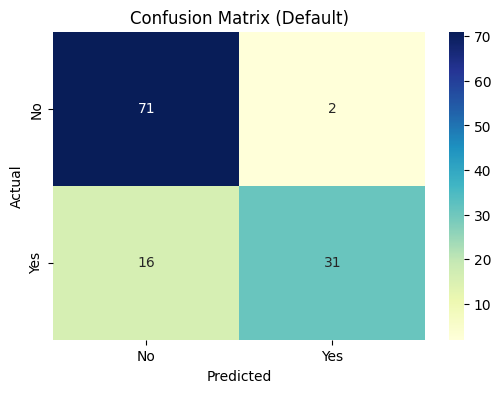

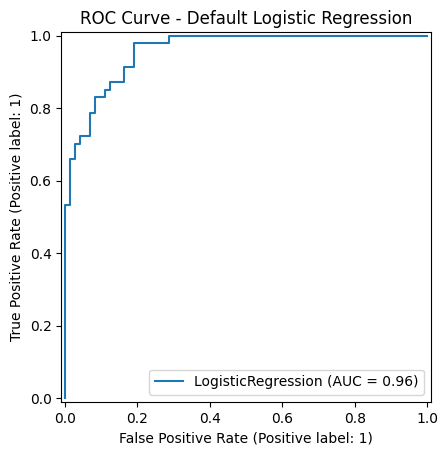

Best Parameters from GridSearchCV: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8666666666666667
Tuned Confusion Matrix:
 [[71  2]
 [14 33]]
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        73
           1       0.94      0.70      0.80        47

    accuracy                           0.87       120
   macro avg       0.89      0.84      0.85       120
weighted avg       0.88      0.87      0.86       120

Tuned ROC AUC Score: 0.8373651996502477
Tuned CV Scores: [0.675 0.675 0.925 0.975 0.975 0.875 0.75  0.825 0.825 0.7  ]
Mean Tuned CV Accuracy: 0.82


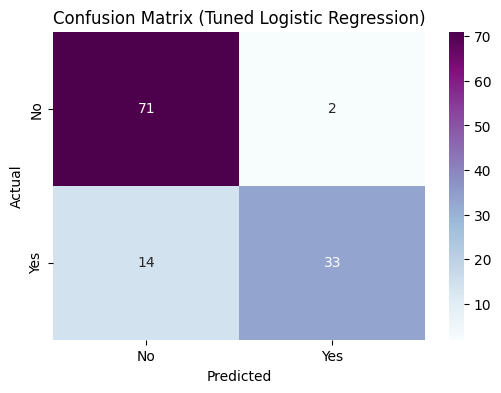

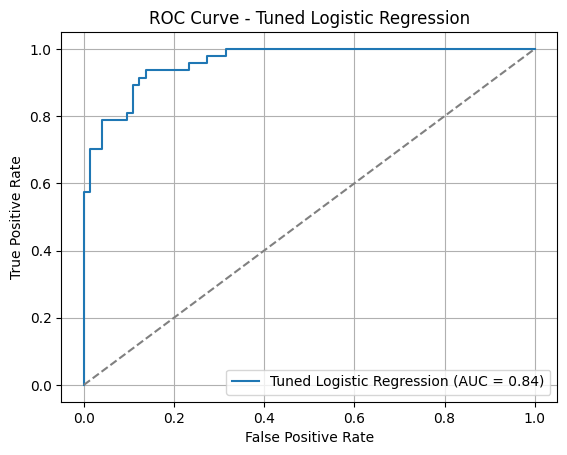

In [18]:
### -----------------------------------------
### 1. Default Logistic Regression Model
### -----------------------------------------

# Train default logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predict
log_preds = log_model.predict(X_val_scaled)

# Accuracy
log_acc = accuracy_score(y_val, log_preds)
print("Default Logistic Regression Accuracy:", log_acc)
log_cm = confusion_matrix(y_val, log_preds)
print("Confusion Matrix:\n", log_cm)
log_cr = classification_report(y_val, log_preds)
print("Classification Report:\n", log_cr)
log_roc_auc = roc_auc_score(y_val, log_preds)
print("ROC AUC Score:", log_roc_auc)

# Cross-validation of tuned model
best_log_cv_scores = cross_val_score(log_model, X, y, cv=10)
print("Tuned CV Scores:", best_log_cv_scores)
print("Mean Tuned CV Accuracy:", best_log_cv_scores.mean())


# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix (Default)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_estimator(log_model, X_val_scaled, y_val)
plt.title("ROC Curve - Default Logistic Regression")
plt.show()


### ---------------------------------------------------------
### 2. Logistic Regression with Hyperparameter Tuning (GridSearchCV)
### ---------------------------------------------------------

param_grid = {
    'penalty': ['l1', 'l2'],  # removed 'elasticnet', None due to solver compatibility
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_log = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_log.fit(X_train_scaled, y_train)

print("Best Parameters from GridSearchCV:", grid_log.best_params_)

# Evaluate best model
best_log_model = grid_log.best_estimator_
best_log_preds = best_log_model.predict(X_val_scaled)

# Evaluation Metrics
best_log_acc = accuracy_score(y_val, best_log_preds)
print("Tuned Logistic Regression Accuracy:", best_log_acc)
best_log_cm = confusion_matrix(y_val, best_log_preds)
print("Tuned Confusion Matrix:\n", best_log_cm)
best_log_cr = classification_report(y_val, best_log_preds)
print("Tuned Classification Report:\n", best_log_cr)
best_log_roc_auc = roc_auc_score(y_val, best_log_preds)
print("Tuned ROC AUC Score:", best_log_roc_auc)

# Cross-validation of tuned model
best_log_cv_scores = cross_val_score(best_log_model, X, y, cv=10)
print("Tuned CV Scores:", best_log_cv_scores)
print("Mean Tuned CV Accuracy:", best_log_cv_scores.mean())

# Plot Confusion Matrix for Tuned Model
plt.figure(figsize=(6, 4))
sns.heatmap(best_log_cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix (Tuned Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
best_log_proba = best_log_model.predict_proba(X_val_scaled)[:, 1]
fpr,tpr,_ = roc_curve(y_val, best_log_proba)
plt.plot(fpr, tpr, label=f'Tuned Logistic Regression (AUC = {best_log_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.9083333333333333
Confusion Matrix:
 [[66  7]
 [ 4 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        73
           1       0.86      0.91      0.89        47

    accuracy                           0.91       120
   macro avg       0.90      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120

ROC AUC: 0.9670649956280968
CV Scores: [0.95  0.75  0.9   0.95  0.975 0.875 0.8   0.825 0.8   0.925]
Mean CV Accuracy: 0.875


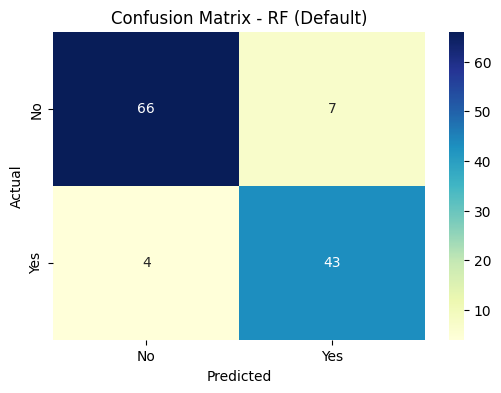

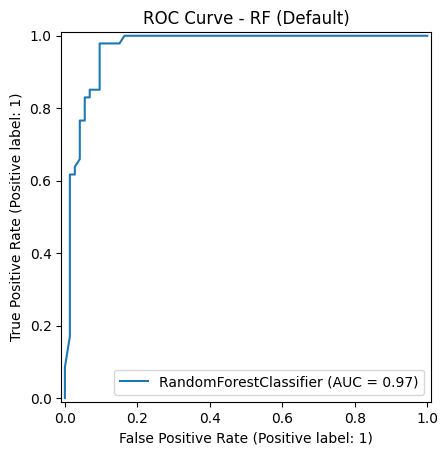

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.95
Confusion Matrix:
 [[68  5]
 [ 1 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        73
           1       0.90      0.98      0.94        47

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.95      0.95      0.95       120

ROC AUC: 0.9715826289711454
CV Scores: [0.875 0.925 0.975 0.925 0.925 0.8   0.8   0.9   0.9   0.875]
Mean CV Accuracy: 0.89


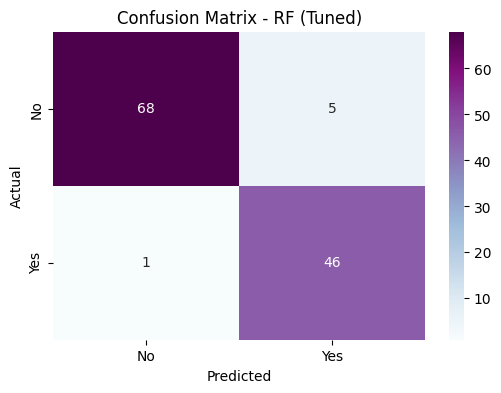

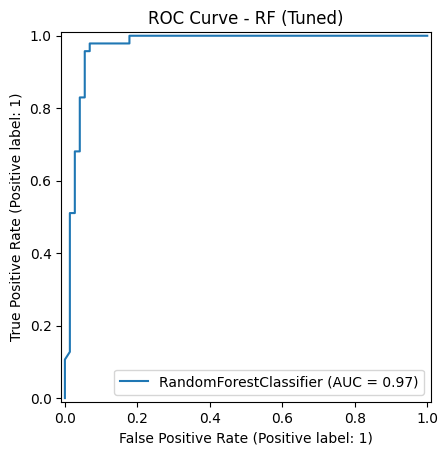

In [19]:
### ----------------------------------
### Random Forest - Default Model
### ----------------------------------

# Default Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_val)
rf_probs = rf_model.predict_proba(X_val)[:, 1]

# Evaluation
rf_acc = accuracy_score(y_val, rf_preds)
print("Accuracy:", rf_acc)
rf_cm = confusion_matrix(y_val, rf_preds)
print("Confusion Matrix:\n", rf_cm)
rf_cr = classification_report(y_val, rf_preds)
print("Classification Report:\n", rf_cr)
rf_roc_auc = roc_auc_score(y_val, rf_probs)
print("ROC AUC:", rf_roc_auc)

# CV Accuracy
rf_cv_scores = cross_val_score(rf_model, X, y, cv=10)
print("CV Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix - RF (Default)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_val, y_val)
plt.title("ROC Curve - RF (Default)")
plt.show()


### ------------------------------------------
### Random Forest - Tuned (GridSearchCV)
### ------------------------------------------

# Parameter Grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# GridSearchCV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid, cv=cv, scoring='accuracy',
                              n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Predict & Evaluate
rf_preds = best_rf_model.predict(X_val)
rf_probs = best_rf_model.predict_proba(X_val)[:, 1]

rf_acc = accuracy_score(y_val, rf_preds)
print("Accuracy:", rf_acc)
rf_cm = confusion_matrix(y_val, rf_preds)
print("Confusion Matrix:\n", rf_cm)
rf_cr = classification_report(y_val, rf_preds)
print("Classification Report:\n", rf_cr)
rf_roc_auc = roc_auc_score(y_val, rf_probs)
print("ROC AUC:", rf_roc_auc)

# CV Accuracy
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=cv)
print("CV Scores:", rf_cv_scores)
print("Mean CV Accuracy:", rf_cv_scores.mean())

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix - RF (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_estimator(best_rf_model, X_val, y_val)
plt.title("ROC Curve - RF (Tuned)")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:07] WARNING: /w

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}
Best CV Accuracy: 0.8964285714285716
Tuned XGBoost Accuracy on Validation Set: 0.925
Confusion Matrix:
 [[70  3]
 [ 6 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.93      0.87      0.90        47

    accuracy                           0.93       120
   macro avg       0.93      0.92      0.92       120
weighted avg       0.93      0.93      0.92       120

ROC AUC Score: 0.915622267560478


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:08] WARNING: /w

CV Scores: [1.    0.75  0.925 0.9   1.    0.825 0.825 0.8   0.8   0.9  ]
Mean CV Accuracy: 0.8724999999999999


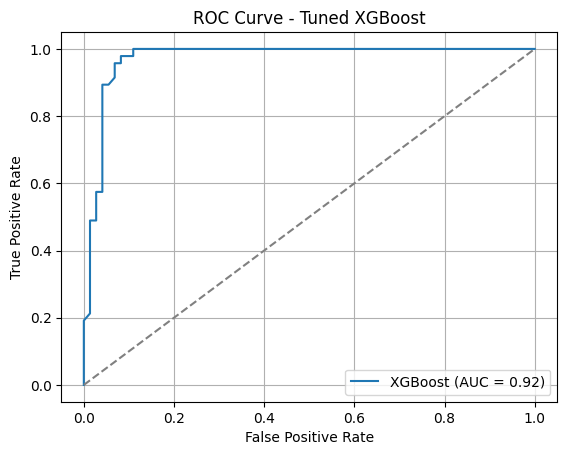

In [20]:
# Model 4
# XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
best_xgb = grid_search.best_estimator_
xgb_preds = best_xgb.predict(X_val)

best_xgb_preds_acc = accuracy_score(y_val, xgb_preds)
print("Tuned XGBoost Accuracy on Validation Set:", best_xgb_preds_acc)
best_xgb_preds_cm = confusion_matrix(y_val, xgb_preds)
print("Confusion Matrix:\n", best_xgb_preds_cm)
best_xgb_preds_cr = classification_report(y_val, xgb_preds)
print("Classification Report:\n", best_xgb_preds_cr)
best_xgb_preds_auc = roc_auc_score(y_val, xgb_preds)
print("ROC AUC Score:", best_xgb_preds_auc)

# Cross-validation
best_xgb_preds_cv = cross_val_score(xgb_model, X, y, cv=10)
print("CV Scores:", best_xgb_preds_cv)
print("Mean CV Accuracy:", best_xgb_preds_cv.mean())


# Plot ROC Curve
best_xgb_preds_proba = best_xgb.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, best_xgb_preds_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {best_xgb_preds_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8916666666666667
Confusion Matrix:
 [[65  8]
 [ 5 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        73
           1       0.84      0.89      0.87        47

    accuracy                           0.89       120
   macro avg       0.88      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120

ROC AUC Score: 0.9723112795103468


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:43:30] WARNING: /w

CV Scores: [1.    0.75  0.925 0.9   1.    0.825 0.825 0.8   0.8   0.9  ]
Mean CV Accuracy: 0.8724999999999999
ROC AUC Score: 0.9723112795103468


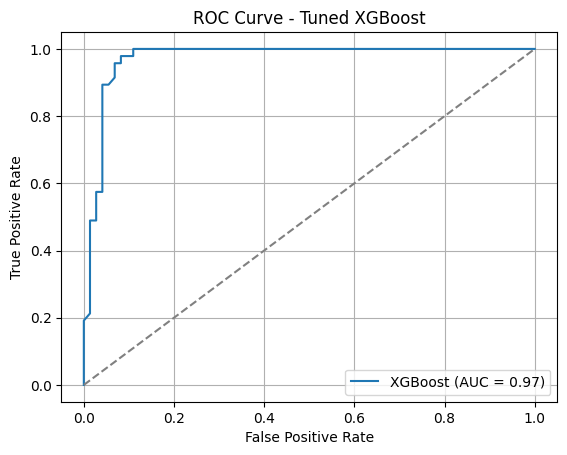

In [21]:
# Model 4
# XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

xgb_acc = accuracy_score(y_val, xgb_preds)
print("XGBoost Accuracy:", xgb_acc)
xgb_cm = confusion_matrix(y_val, xgb_preds)
print("Confusion Matrix:\n", xgb_cm)
xgb_cr = classification_report(y_val, xgb_preds)
print("Classification Report:\n", xgb_cr)
xgb_proba = best_xgb.predict_proba(X_val)[:, 1]
xgb_auc = roc_auc_score(y_val, xgb_proba)
print("ROC AUC Score:", xgb_auc)

# Cross-validation
xgb_cv = cross_val_score(xgb_model, X, y, cv=10)
print("CV Scores:", xgb_cv)
print("Mean CV Accuracy:", xgb_cv.mean())

# ROC AUC Score and ROC Curve for best XGboost model
xgb_proba = best_xgb.predict_proba(X_val)[:, 1]
xgb_val_auc = roc_auc_score(y_val, xgb_proba)
print("ROC AUC Score:", xgb_val_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, xgb_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Value vs Accuracy')
plt.grid(True)
plt.show()

Best k: 15
Best K value: {'n_neighbors': 15}
Best CV Score: 0.8964285714285716
Tuned KNN Accuracy on Validation Set: 0.9333333333333333
Confusion Matrix:
 [[69  4]
 [ 4 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

Cross-Validation Scores: [0.85714286 1.         0.92857143 0.92857143 0.92857143 0.82142857
 0.85714286 0.85714286 0.92857143 0.85714286]
Mean CV Accuracy: 0.8964285714285716
ROC AUC Score: 0.9766831827455551


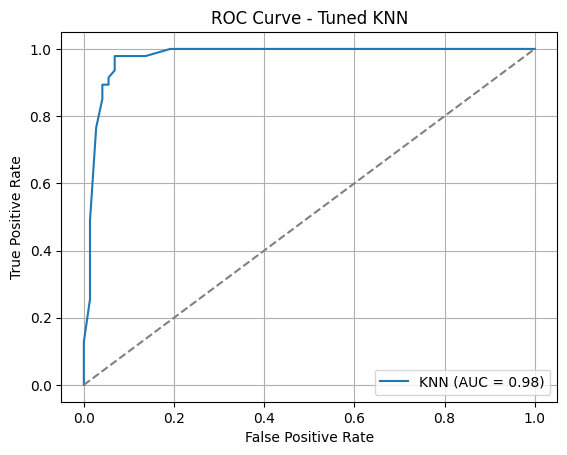

In [22]:
# Model 5.
# KNeighborsClassifier
k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
    cv_scores.append(scores.mean())

best_k = k_range[cv_scores.index(max(cv_scores))]
print("Best k:", best_k)

param_grid = {'n_neighbors': list(range(1, 21))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid_knn.fit(X_train_scaled, y_train)

print("Best K value:", grid_knn.best_params_)
print("Best CV Score:", grid_knn.best_score_)

# Best model from GridSearchCV
best_knn_model = grid_knn.best_estimator_

# Predict on validation data
best_knn_preds = best_knn_model.predict(X_val_scaled)

# Accuracy on validation set
best_knn_acc = accuracy_score(y_val, best_knn_preds)
print("Tuned KNN Accuracy on Validation Set:", best_knn_acc)
best_knn_cm = confusion_matrix(y_val, best_knn_preds)
print("Confusion Matrix:\n", best_knn_cm)
best_knn_cr = classification_report(y_val, best_knn_preds)
print("Classification Report:\n", best_knn_cr)

# Cross-validation
knn_cv_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=10)
print("Cross-Validation Scores:", knn_cv_scores)
print("Mean CV Accuracy:", knn_cv_scores.mean())

# ROC AUC Score and ROC Curve for best KNN model
best_knn_proba = best_knn_model.predict_proba(X_val_scaled)[:, 1]
best_knn_auc = roc_auc_score(y_val, best_knn_proba)
print("ROC AUC Score:", best_knn_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, best_knn_proba)
plt.plot(fpr, tpr, label=f'KNN (AUC = {best_knn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned KNN")
plt.legend()
plt.grid(True)
plt.show()

KNeighbourClassifier Accuracy: 0.9333333333333333
Confusion Matrix:
 [[69  4]
 [ 4 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

Cross-Validation Scores: [0.85714286 0.96428571 0.89285714 0.92857143 0.89285714 0.85714286
 0.78571429 0.89285714 0.92857143 0.82142857]
Mean CV Accuracy: 0.8821428571428571
ROC AUC Score: 0.9795977849023607


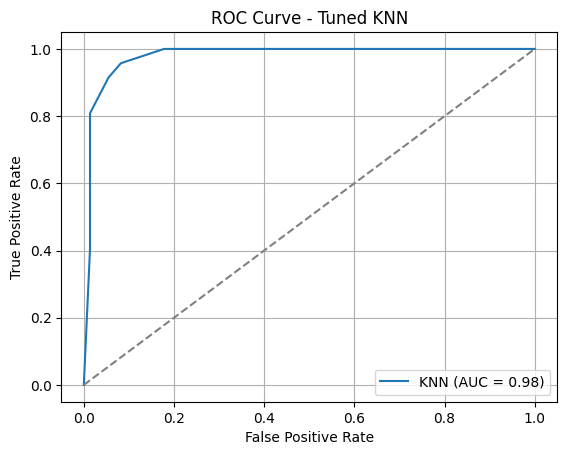

In [23]:
# Model 5.
# KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_val_scaled)

knn_acc = accuracy_score(y_val, knn_preds)
print("KNeighbourClassifier Accuracy:", knn_acc)
knn_cm = confusion_matrix(y_val, knn_preds)
print("Confusion Matrix:\n", knn_cm)
knn_cr = classification_report(y_val, knn_preds)
print("Classification Report:\n", knn_cr)


# Cross-validation
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=10)
print("Cross-Validation Scores:", knn_cv_scores)
print("Mean CV Accuracy:", knn_cv_scores.mean())

# ROC AUC Score and ROC Curve for best KNN model
knn_proba = knn_model.predict_proba(X_val_scaled)[:, 1]
knn_val_auc = roc_auc_score(y_val, knn_proba)
print("ROC AUC Score:", knn_val_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, knn_proba)
plt.plot(fpr, tpr, label=f'KNN (AUC = {knn_val_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned KNN")
plt.legend()
plt.grid(True)
plt.show()


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine Accuracy: 0.9416666666666667
Confusion Matrix:
 [[68  5]
 [ 2 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.90      0.96      0.93        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

ROC AUC Score: 0.9444768289128534
Cross-Validation Scores: [0.775 0.8   0.75  0.825 0.825 0.7   0.775 0.8   0.75  0.85 ]
Mean CV Accuracy: 0.7849999999999999


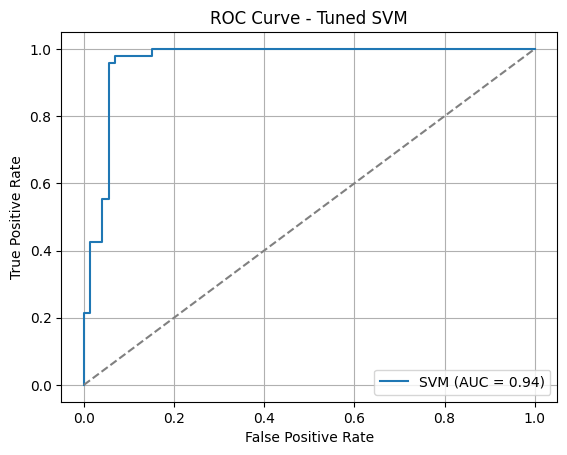

In [24]:
# Model 6.
# Support Vector Machine

# 1. Define Hyperparameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}
# 2. Initialize SVC with probability=True
svm = SVC(probability=True)

# 3. Setup GridSearchCV with Stratified KFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# 4. Fit GridSearch on Training Data
grid_search.fit(X_train_scaled, y_train)

# 5. Best Parameters & Model
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# 6. Predict on Validation Data
best_svm_preds = best_svm_model.predict(X_val_scaled)

# 7. Evaluation Metrics
best_svm_preds_acc = accuracy_score(y_val, best_svm_preds)
print("Support Vector Machine Accuracy:", best_svm_preds_acc)
best_svm_preds_cm = confusion_matrix(y_val, best_svm_preds)
print("Confusion Matrix:\n", best_svm_preds_cm)
best_svm_preds_cr = classification_report(y_val, best_svm_preds)
print("Classification Report:\n", best_svm_preds_cr)
best_svm_preds_roc_auc = roc_auc_score(y_val, best_svm_preds)
print("ROC AUC Score:", best_svm_preds_roc_auc)

# 8. Cross-validation on full data
best_svm_preds_cv_scores = cross_val_score(best_svm_model, X, y, cv=cv)
print("Cross-Validation Scores:", best_svm_preds_cv_scores)
print("Mean CV Accuracy:", best_svm_preds_cv_scores.mean())

# Plot ROC Curve
best_svm_preds_probs = best_svm_model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_val, best_svm_preds_probs)
plt.plot(fpr, tpr, label=f'SVM (AUC = {best_svm_preds_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned SVM")
plt.legend()
plt.grid(True)
plt.show()

Support Vector Machine Accuracy: 0.9416666666666667
Confusion Matrix:
 [[68  5]
 [ 2 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.90      0.96      0.93        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

ROC AUC Score: 0.9444768289128534
Cross-Validation Scores: [0.775 0.8   0.75  0.825 0.825 0.7   0.775 0.8   0.75  0.85 ]
Mean CV Accuracy: 0.7849999999999999


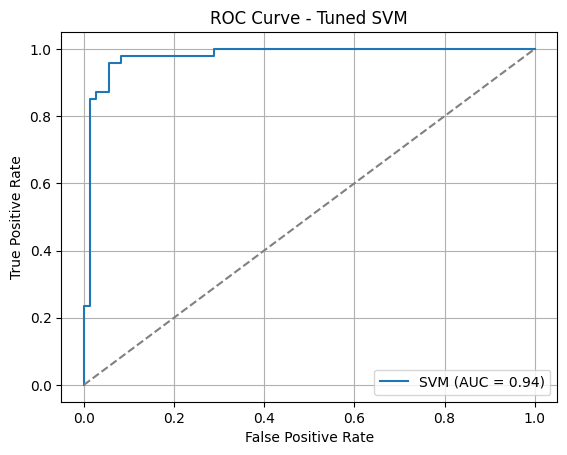

In [25]:
# Model 6.
# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_val_scaled)


# Evaluation Metrics
svm_acc = accuracy_score(y_val, svm_preds)
print("Support Vector Machine Accuracy:", svm_acc)
svm_cm = confusion_matrix(y_val, svm_preds)
print("Confusion Matrix:\n", svm_cm)
svm_cr = classification_report(y_val, svm_preds)
print("Classification Report:\n", svm_cr)
svm_auc = roc_auc_score(y_val, svm_preds)
print("ROC AUC Score:", svm_auc)

# Cross-validation on full data
svm_cv_scores = cross_val_score(best_svm_model, X, y, cv=cv)
print("Cross-Validation Scores:", svm_cv_scores)
print("Mean CV Accuracy:", svm_cv_scores.mean())

# Plot ROC Curve
svm_probs = svm_model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_val, svm_probs)
plt.plot(fpr, tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned SVM")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# ----------------------------------------
# FINAL SUMMARY: Collect results of all models
# ----------------------------------------

# Store results in a list of dicts
results = [
    {
        "Model": "Decision Tree (Default)",
        "Accuracy": tree_acc,
        "CV Mean": tree_cv.mean(),
        "ROC-AUC": roc_auc_score(y_val, tree_model.predict_proba(X_val)[:, 1]),
        "Confusion Matrix": tree_cm,
        "Classification Report": tree_cr
    },
    {
        "Model": "Decision Tree (Tuned)",
        "Accuracy": best_acc,
        "CV Mean": tuned_cv_scores.mean(),
        "ROC-AUC": roc_auc_score(y_val, best_tree_model.predict_proba(X_val)[:, 1]),
        "Confusion Matrix": best_cm,
        "Classification Report": best_cr
    },
    {
        "Model": "Logistic Regression (Default)",
        "Accuracy": log_acc,
        "CV Mean": best_log_cv_scores.mean(),
        "ROC-AUC": roc_auc_score(y_val, log_model.predict_proba(X_val_scaled)[:, 1]),
        "Confusion Matrix": log_cm,
        "Classification Report": log_cr
    },
    {
        "Model": "Logistic Regression (Tuned)",
        "Accuracy": best_log_acc,
        "CV Mean": best_log_cv_scores.mean(),
        "ROC-AUC": roc_auc_score(y_val, best_log_model.predict_proba(X_val_scaled)[:, 1]),
        "Confusion Matrix": best_log_cm,
        "Classification Report": best_log_cr
    },
    {
        "Model": "Random Forest (Default)",
        "Accuracy": rf_acc,
        "CV Mean": rf_cv_scores.mean(),
        "ROC-AUC": rf_roc_auc,
        "Confusion Matrix": rf_cm,
        "Classification Report": rf_cr
    },
    {
        "Model": "Random Forest (Tuned)",
        "Accuracy": rf_acc,
        "CV Mean": rf_cv_scores.mean(),
        "ROC-AUC": rf_roc_auc,
        "Confusion Matrix": rf_cm,
        "Classification Report": rf_cr
    },
    {
        "Model": "XGBoost (Default)",
        "Accuracy": xgb_acc,
        "CV Mean": xgb_cv.mean(),
        "ROC-AUC": xgb_auc,
        "Confusion Matrix": xgb_cm,
        "Classification Report": xgb_cr
    },
    {
        "Model": "XGBoost (Tuned)",
        "Accuracy": best_xgb_preds_acc,
        "CV Mean": best_xgb_preds_cv.mean(),
        "ROC-AUC": best_xgb_preds_auc,
        "Confusion Matrix": best_xgb_preds_cm,
        "Classification Report": best_xgb_preds_cr
    },
    {
        "Model": "KNN (Default)",
        "Accuracy": knn_acc,
        "CV Mean": knn_cv_scores.mean(),
        "ROC-AUC": knn_val_auc,
        "Confusion Matrix": knn_cm,
        "Classification Report": knn_cr
    },
    {
        "Model": "KNN (Tuned)",
        "Accuracy": best_knn_acc,
        "CV Mean": knn_cv_scores.mean(),
        "ROC-AUC": best_knn_auc,
        "Confusion Matrix": best_knn_cm,
        "Classification Report": best_knn_cr
    },
    {
        "Model": "SVM (Default)",
        "Accuracy": svm_acc,
        "CV Mean": svm_cv_scores.mean(),
        "ROC-AUC": roc_auc_score(y_val, svm_model.predict_proba(X_val_scaled)[:, 1]),
        "Confusion Matrix": svm_cm,
        "Classification Report": svm_cr
    },
    {
        "Model": "SVM (Tuned)",
        "Accuracy": best_svm_preds_acc,
        "CV Mean": best_svm_preds_cv_scores.mean(),
        "ROC-AUC": roc_auc_score(y_val, best_svm_model.predict_proba(X_val_scaled)[:, 1]),
        "Confusion Matrix": best_svm_preds_cm,
        "Classification Report": best_svm_preds_cr
    }
]

# Convert results into DataFrame
results_df = pd.DataFrame(results)

# Display full summary DataFrame
pd.set_option("display.max_colwidth", None)  # to see full classification reports
print("\n===== Final Comparison Table =====\n")
print(results_df)



===== Final Comparison Table =====

                            Model  Accuracy   CV Mean   ROC-AUC  \
0         Decision Tree (Default)  0.916667  0.875000  0.958030   
1           Decision Tree (Tuned)  0.925000  0.872500  0.958321   
2   Logistic Regression (Default)  0.850000  0.820000  0.958030   
3     Logistic Regression (Tuned)  0.866667  0.820000  0.960361   
4         Random Forest (Default)  0.950000  0.890000  0.971583   
5           Random Forest (Tuned)  0.950000  0.890000  0.971583   
6               XGBoost (Default)  0.891667  0.872500  0.972311   
7                 XGBoost (Tuned)  0.925000  0.872500  0.915622   
8                   KNN (Default)  0.933333  0.882143  0.979598   
9                     KNN (Tuned)  0.933333  0.882143  0.976683   
10                  SVM (Default)  0.941667  0.785000  0.978432   
11                    SVM (Tuned)  0.941667  0.785000  0.965025   

       Confusion Matrix  \
0    [[69, 4], [6, 41]]   
1    [[69, 4], [5, 42]]   
2   [[71, 

/tmp/ipython-input-24254889.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")


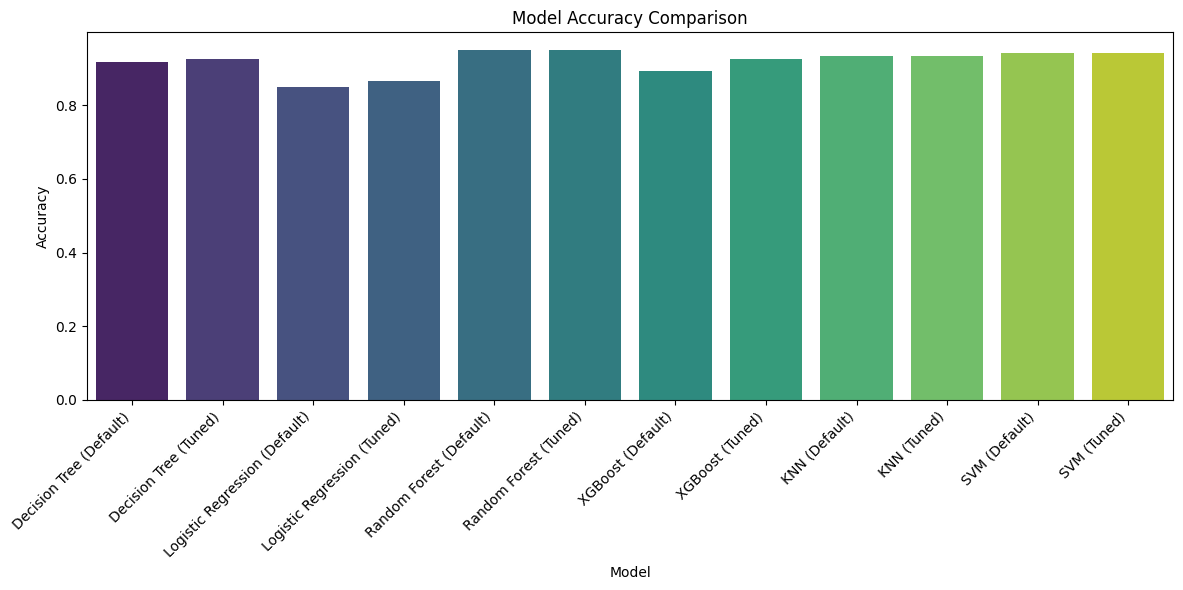

In [27]:

# ----------------------------------------
# Accuracy Comparison Barplot
# ----------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.tight_layout()
plt.show()
